# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [18]:
df2 = pd.read_csv('/content/drive/MyDrive/DS 3001/pretrial_data.csv')
df2_clean = df2.copy()
df2_clean.head()

,Unnamed: 0,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA
0,0,F,31.0,M,W,NaN,NaN,7,0.0,0.0,0.44,NaN,NaN,NaN,True,False,True
1,1,F,60.0,M,B,NaN,NaN,7,13.0,21.0,0.44,0.0,0.0,60.000000,True,False,False
2,2,M,27.0,M,W,NaN,NaN,7,0.0,0.0,0.44,0.0,1.0,12.000000,True,False,False
3,3,M,27.0,M,B,0.0,NaN,7,0.0,9.0,0.44,0.0,1.0,0.985626,True,False,False
4,4,F,28.0,F,W,0.0,NaN,7,0.0,0.0,0.44,1.0,4.0,0.000000,True,False,True


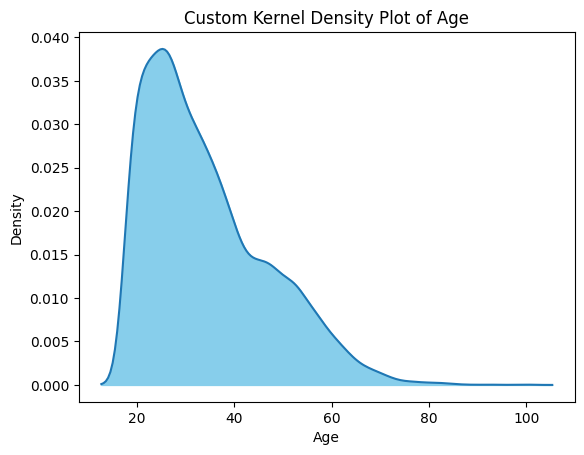

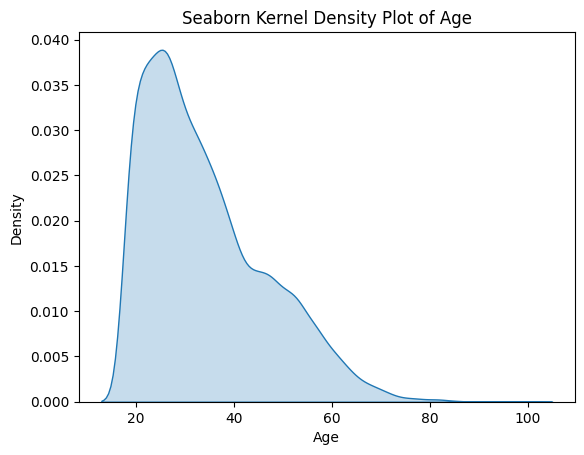

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def gaussian_kernel(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

def uniform_kernel(x):
    mask = np.abs(x) <= 1
    return 0.5 * mask

def epanechnikov_kernel(x):
    mask = np.abs(x) <= 1
    return 0.75 * (1 - x**2) * mask

# Main KDE function
def kernel_density_plot(data, points = None, kernel = gaussian_kernel, bandwidth = None):
    if bandwidth is None:
        bandwidth = 1.06 * np.std(data) * len(data)**(-1/5)

    if points is None:
        points = np.linspace(np.min(data) - 3*bandwidth, np.max(data) + 3*bandwidth, 200)

    n = len(data)
    kde_values = np.zeros_like(points)

    for i, x in enumerate(points):
        u = (x - data) / bandwidth
        kernels = kernel(u)
        kde_values[i] = np.sum(kernels) / (n * bandwidth)

    return points, kde_values

data = df2_clean['age']
points, kde_values = kernel_density_plot(data)

sns.lineplot(x = points, y = kde_values)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Custom Kernel Density Plot of Age')
plt.fill_between(points, kde_values, color='skyblue')
plt.show()

sns.kdeplot(data, fill = True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Seaborn Kernel Density Plot of Age')
plt.show()

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS 3001/college_completion.csv')
df_clean = df.copy()
len(df_clean) #3798 rows
df_clean.head() #63 columns

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
pd.crosstab(df_clean['level'], df_clean['control'])
# A large number of the 4 year programs are private, not for profit compared to 2 year programs

control,Private for-profit,Private not-for-profit,Public
level,,,
2-year,465,68,926
4-year,527,1180,632


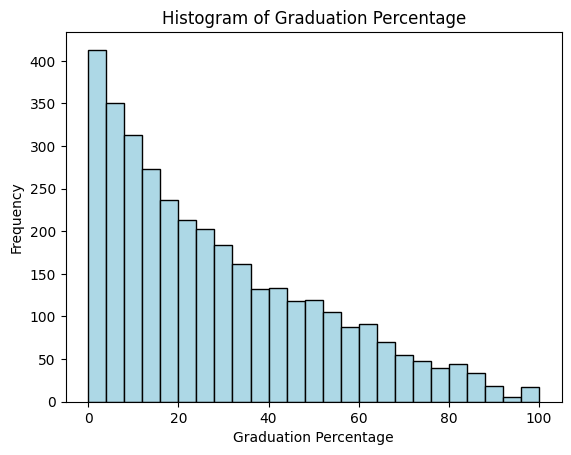

Text(0.5, 1.0, 'Kernel Density Plot of Graduation Percentage')

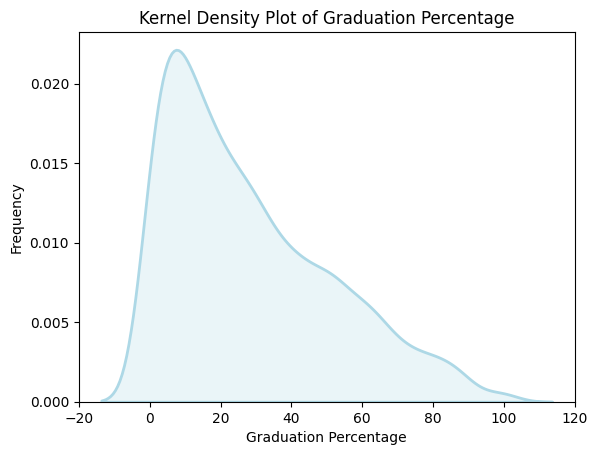

In [ ]:
column = df_clean['grad_100_value']

plt.hist(column, bins = 25, color = 'lightblue', edgecolor = 'black')
plt.xlabel('Graduation Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Graduation Percentage')
plt.show()

sns.kdeplot(column, color = "lightblue", linewidth = 2, fill = True)
plt.xlabel('Graduation Percentage')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of Graduation Percentage')


,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


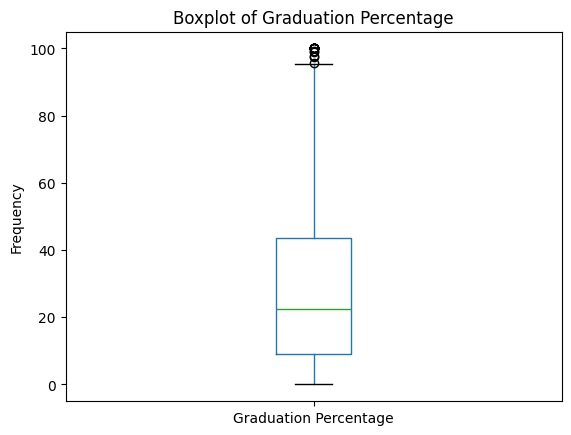

In [ ]:
df_clean.boxplot(column="grad_100_value", grid=False)
plt.xticks([1], ["Graduation Percentage"])
plt.ylabel('Frequency')
plt.title('Boxplot of Graduation Percentage')

df_clean['grad_100_value'].describe()

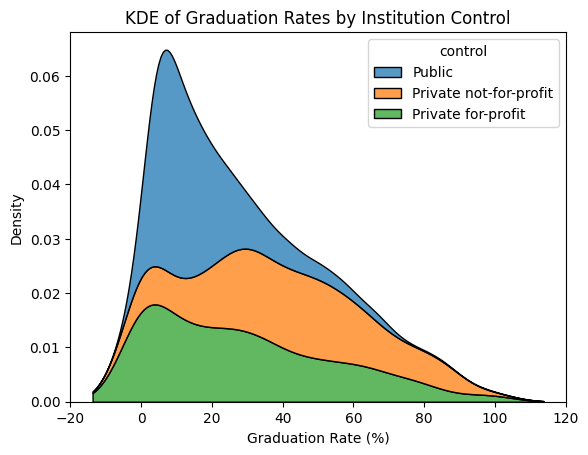

In [ ]:
sns.kdeplot(
    data=df,
    x="grad_100_value",
    hue="control",
    multiple="stack",
    common_norm=False,
    fill=True
)
plt.title("KDE of Graduation Rates by Institution Control")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.show() #From this graph I can see that the public control has a higher number of schools in the lower graduation rate, whereas the private not for profit and private not for profit has higher number of schools with higher graduation rates.

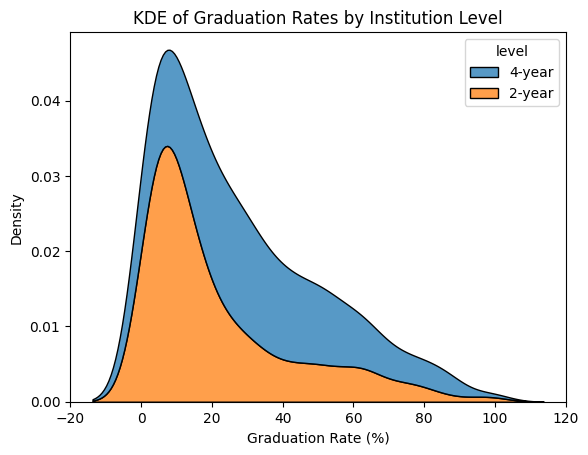

                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public       

In [ ]:
sns.kdeplot(
    data=df,
    x="grad_100_value",
    hue="level",
    multiple="stack",
    common_norm=False,
    fill=True
)
plt.title("KDE of Graduation Rates by Institution Level")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.show()

grouped_stats = df.groupby(["level","control"])["grad_100_value"].describe()
print(grouped_stats) #From this graph I can tell that there are a higher number of 4 year programs that have lower graduation rates, but this tapers slower. The 2 year has a lower number of schools with low graduation rates, but tapers much faster in the number with higher graduation rates.

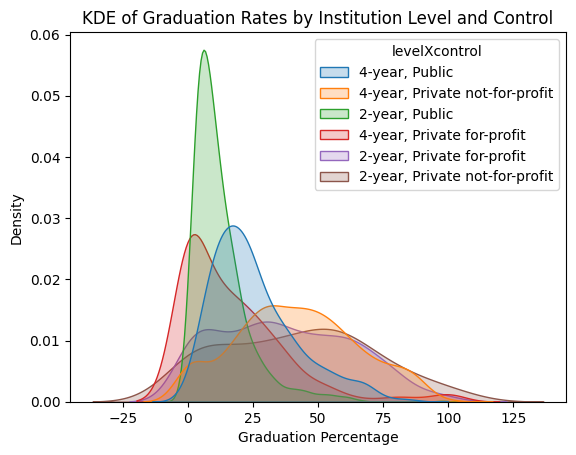

In [ ]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(
    data=df,
    x="grad_100_value",
    hue="levelXcontrol",
    fill=True,
    common_norm=False,
)
plt.title("KDE of Graduation Rates by Institution Level and Control")
plt.xlabel("Graduation Percentage")
plt.ylabel("Density")
plt.show() #The 4 year private not for profit, 2 year private not for profit seems to have larger amounts of schools with higher graduation rates. The 2 year public schools seem to have a large number of schools with low graduation rates.

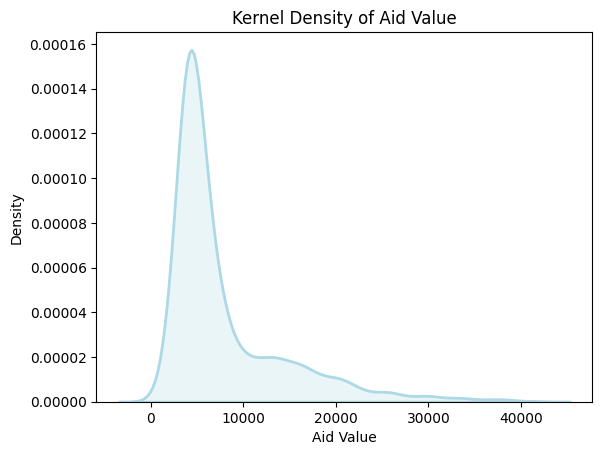

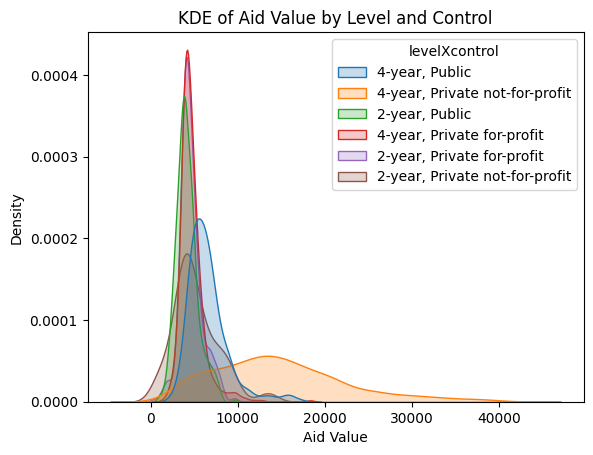

In [ ]:
sns.kdeplot(df["aid_value"], fill=True, color="lightblue", linewidth=2)

plt.title("Kernel Density of Aid Value")
plt.xlabel("Aid Value")
plt.ylabel("Density")
plt.show()

sns.kdeplot(
    data=df,
    x="aid_value",
    hue="levelXcontrol",
    fill=True,
    common_norm=False,
)
plt.title("KDE of Aid Value by Level and Control")
plt.xlabel("Aid Value")
plt.ylabel("Density")
plt.show()


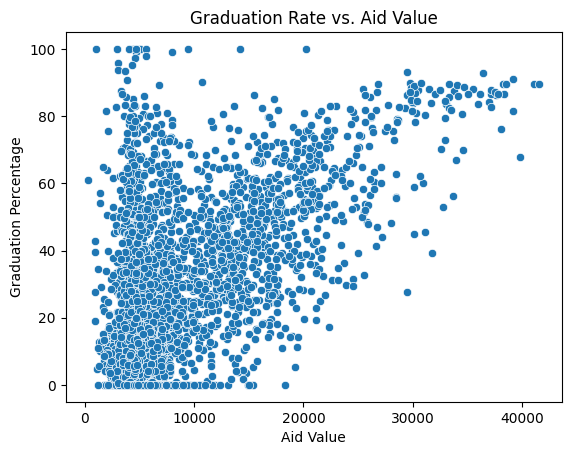

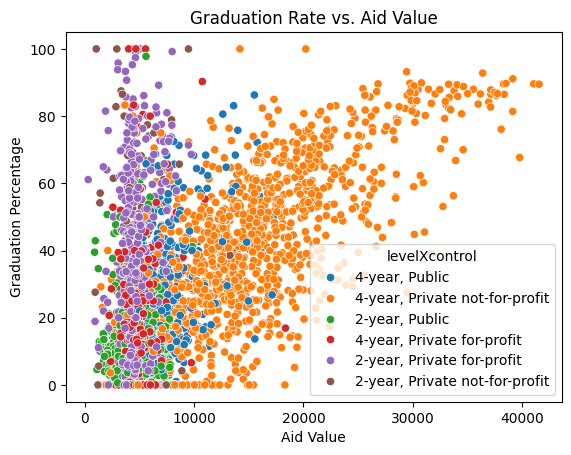

In [ ]:
sns.scatterplot(
    data=df,
    x="aid_value",
    y="grad_100_value",
)

plt.title("Graduation Rate vs. Aid Value")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Percentage")
plt.show()

sns.scatterplot(
    data=df,
    x="aid_value",
    y="grad_100_value",
    hue="levelXcontrol",
)

plt.title("Graduation Rate vs. Aid Value")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Percentage")
plt.show()